In [338]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-from-disaster-machine-learning/train.csv
/kaggle/input/titanic-from-disaster-machine-learning/test.csv
/kaggle/input/titanic-from-disaster-machine-learning/gender_submission.csv


In [339]:
train_data = pd.read_csv(r"/kaggle/input/titanic-from-disaster-machine-learning/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [340]:
# proper way to analyze all data
print(train_data.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [341]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [342]:
print(test_data.to_string())

     PassengerId  Pclass                                                             Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0            892       3                                                 Kelly, Mr. James    male  34.50      0      0              330911    7.8292              NaN        Q
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00      1      0              363272    7.0000              NaN        S
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00      0      0              240276    9.6875              NaN        Q
3            895       3                                                 Wirz, Mr. Albert    male  27.00      0      0              315154    8.6625              NaN        S
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00      1      1       

In [343]:
test_data = pd.read_csv(r"/kaggle/input/titanic-from-disaster-machine-learning/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [344]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [345]:
females = train_data.loc[train_data.Sex == "female"]["Survived"]  # how many females survived
females
per_of_females = sum(females)/len(females)
print("Percent(%) of females : ", per_of_females)

Percent(%) of females :  0.7420382165605095


In [346]:
males = train_data.loc[train_data.Sex == "male"]["Survived"]   # how many males survived
males
per_of_males = sum(males)/len(males)
print("Percent(%) of males : ", per_of_males)

Percent(%) of males :  0.18890814558058924


In [347]:
from sklearn.ensemble import RandomForestClassifier

In [348]:
y = train_data["Survived"]       # our target is "Survived" data
features = ["Sex","SibSp","Parch","Pclass"]
x = pd.get_dummies(train_data[features])     # create dummy data as like binary(0,1) to both train_data and test_data
x_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)
model.fit(x, y)

RandomForestClassifier(max_depth=5, random_state=42)

In [349]:
predict = model.predict(x_test)
result = pd.DataFrame({"PassengerId" : test_data.PassengerId, "Prediction result" : predict})

In [350]:
# let's submit csv 
result.to_csv("submission.csv", index = False)
print("Your csv file submitted")

Your csv file submitted


In [351]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

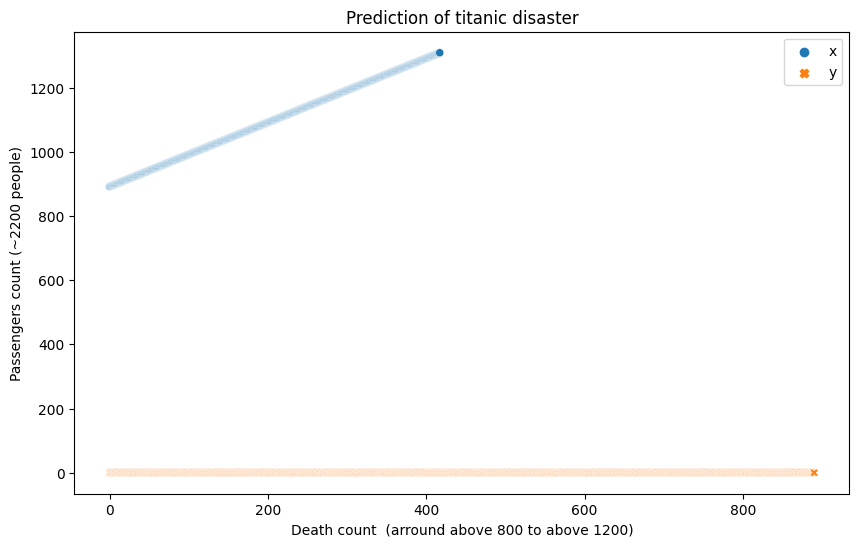

In [352]:
# show prediction using graph
data = pd.DataFrame({
    "x" : test_data.PassengerId,
    "y" : train_data.Survived
})
plt.figure(figsize=(10,6))
sns.scatterplot(data = data)
plt.ylabel("Passengers count (~2200 people)")
plt.xlabel("Death count  (arround above 800 to above 1200)")
plt.title("Prediction of titanic disaster")
plt.show()